# Transactions EDA

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from datetime import datetime
sb.set() # set the default Seaborn style for graphics
sb.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline

### Extracting Transaction Data

In [3]:
transactiondata = pd.read_csv('./transactions.csv')
transactiondata = transactiondata.loc[:, ~transactiondata.columns.str.contains('^Unnamed')]
transactiondata.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-01-02,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565002,0.030492,2
1,2020-01-02,00025f8226be50dcab09402a2cacd520a99e112fe01fdd...,797565001,0.030492,2
2,2020-01-02,00067622de3151a7219b4ed9922def50b51601fbe41418...,801865004,0.018627,1
3,2020-01-02,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020322,2
4,2020-01-02,0010f56acce349e6e82bfef13ee39232a8bc0db0801ca4...,578752001,0.020339,2


In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
transactiondata.describe()['price']

count   10967372.00000
mean           0.02715
std            0.01732
min            0.00003
25%            0.01653
50%            0.02541
75%            0.03388
max            0.50678
Name: price, dtype: float64

### Analyzing trends on historical article prices in transactions made

1. Price range of all transactions
2. Mean customer spending over time
3. Mean price of Article in index_group over time
4. Price variation of Articles in product_groups

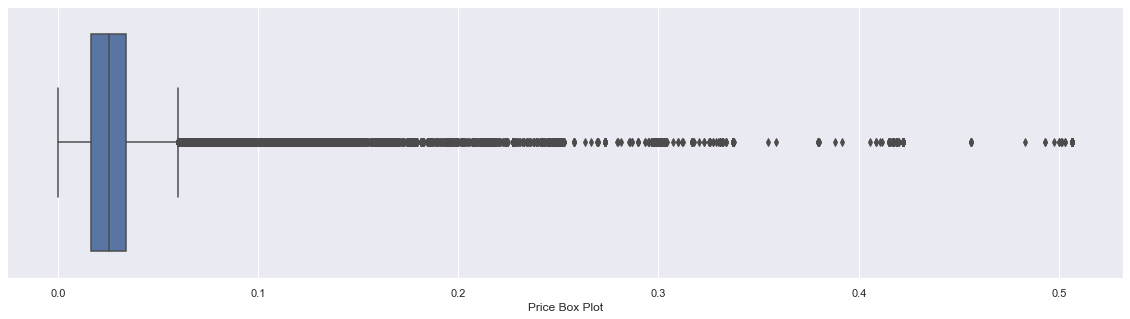

In [6]:
sb.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20,5))
ax = sb.boxplot(data=transactiondata, x='price')
ax.set_xlabel('Price Box Plot')
plt.show()

Since there seems to be a lot of price outliers and values span over a huge range, we use a KDE plot for better visualization.

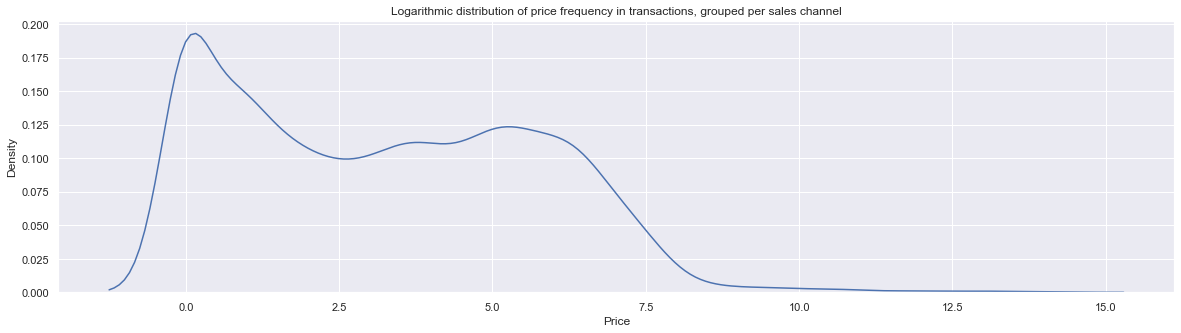

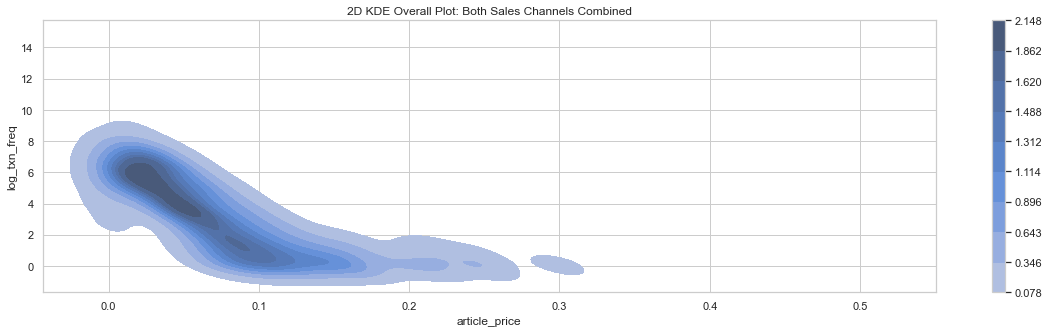

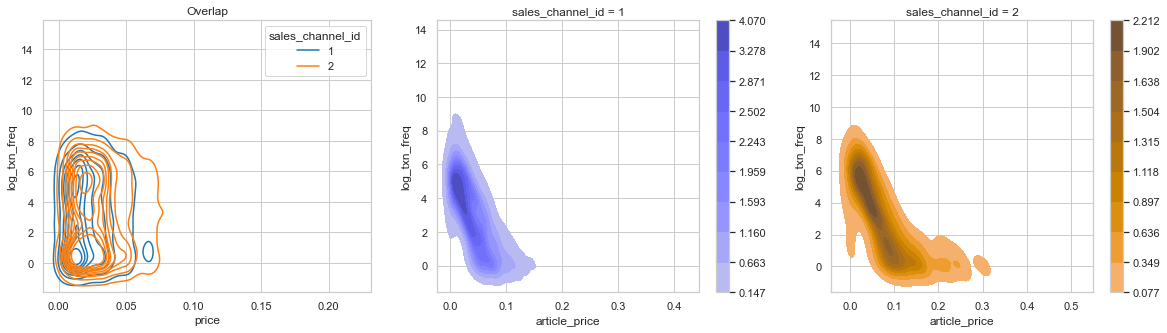

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
sb.set_style('whitegrid')

# sb.kdeplot(np.log(transactiondata.loc[transactiondata["sales_channel_id"]==1].price.value_counts()))
log_txn_freq = np.log(transactiondata.price.value_counts())
sb.kdeplot(log_txn_freq)
# ax.legend(labels=['Sales channel 1', 'Sales channel 2'])
ax.set_xlabel("Price")
plt.title("Logarithmic distribution of price frequency in transactions, grouped per sales channel")
plt.show()


fig, ax = plt.subplots(figsize=(20, 5))
df0 = log_txn_freq.reset_index()
df0.columns = ['article_price', 'log_txn_freq']
sb.kdeplot(data=df0, x="article_price", y="log_txn_freq", shade=True, cbar=True)
plt.title("2D KDE Overall Plot: Both Sales Channels Combined")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
df1 = np.log(transactiondata.loc[transactiondata["sales_channel_id"]==1].price.value_counts()).reset_index()
df1.columns = ['article_price', 'log_txn_freq']
df2 = np.log(transactiondata.loc[transactiondata["sales_channel_id"]==2].price.value_counts()).reset_index()
df2.columns = ['article_price', 'log_txn_freq']

df3 = transactiondata.copy()
temp = log_txn_freq.reset_index()
df3.insert(0, 'log_txn_freq', temp.iloc[:,1])
df3.dropna(inplace=True)
palette = ['tab:blue','tab:orange']
sb.kdeplot(data=df3, x="price", y="log_txn_freq", hue="sales_channel_id", ax=ax[0], palette=palette).set(title = "Overlap")

sb.kdeplot(x=df1.article_price, y=df1.log_txn_freq, shade=True, cbar=True, color = 'blue', ax=ax[1]).set(title = "sales_channel_id = 1")
sb.kdeplot(x=df2.article_price, y=df2.log_txn_freq, shade=True, cbar=True, color = 'orange', ax=ax[2]).set(title = "sales_channel_id = 2")
plt.show()


# print(df)
# print(transactiondata.loc[transactiondata["sales_channel_id"]==1].price.value_counts())
# print(np.log(transactiondata.loc[transactiondata["sales_channel_id"]==1].price.value_counts()).value_counts())

First plot shows the KDE of the frequency of transactions by increasing price

Second two mini plots show a 2-D KDE of frequency of txn by price per sales channel

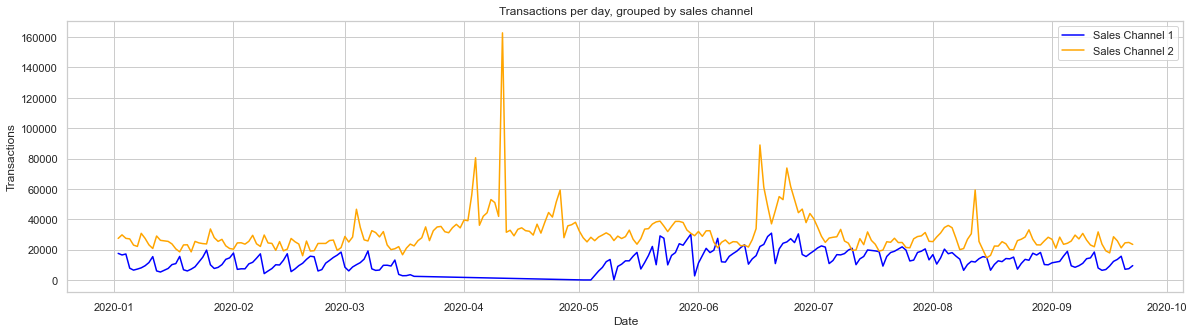

In [8]:
df = transactiondata.groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df.columns = ["Date", "Sales Channel Id", "Transactions"]
df.loc[:,'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
fig, ax = plt.subplots(1, 1, figsize=(20,5))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Orange")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by sales channel")
plt.show()

Interesting Findings: We extract general trends from the transactions dataset per Sales Channel. There is a weird lull period of sales channel 1. Transactions seem to ebb and flow each week in a very cyclically manner. Can help with demand prediction. 